In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-survey/Data_dictionary.txt
/kaggle/input/healthcare-survey/health_dataset.csv


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


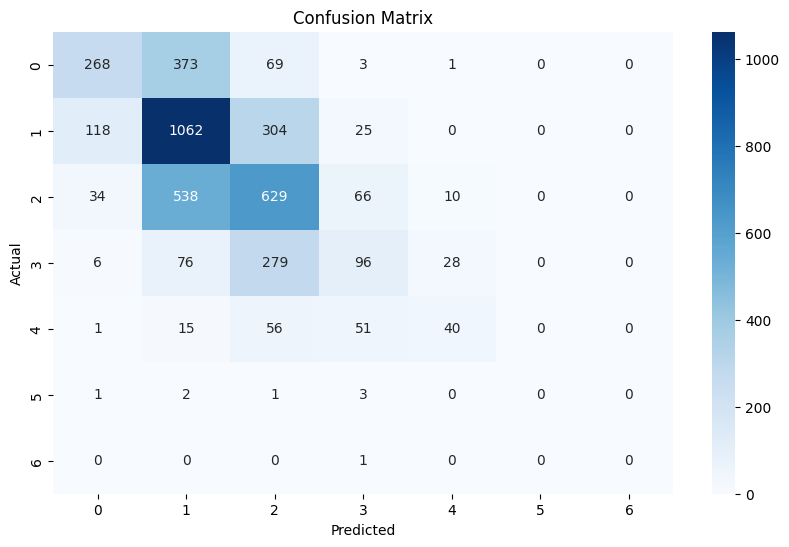

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


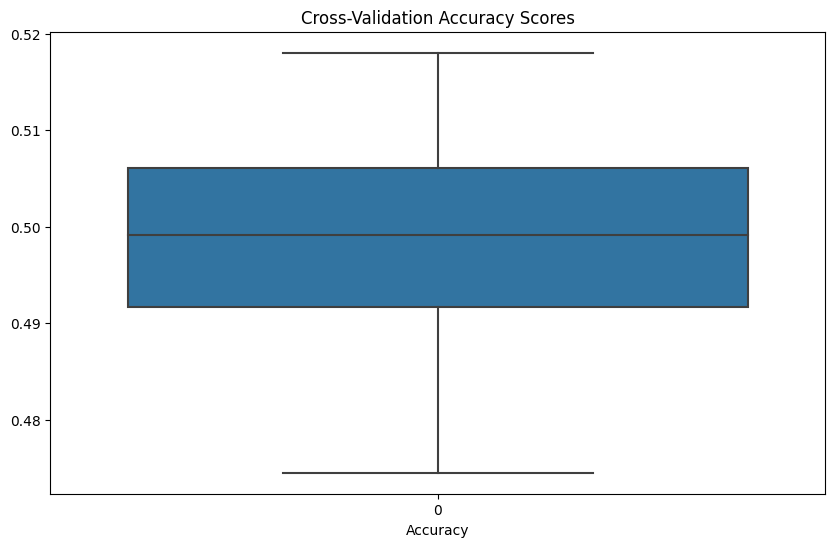

(0.5040904716073147,
 0.35835364182268237,
 0.2878607260701805,
 0.3054486921230157)

In [5]:
# Import necessary libraries for model improvement and visualization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv('/kaggle/input/healthcare-survey/health_dataset.csv')

# Replace placeholder values with NaN and drop rows with NaN
df.replace(9996, np.nan, inplace=True)
df.dropna(inplace=True)

# Identify the target and features (assuming 'Gen_health_state' as a stress indicator proxy)
target = 'Gen_health_state'
X = df.drop(columns=['ADM_RNO1', target])
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluations
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation scores for accuracy visualization
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='accuracy')

# Plot cross-validation accuracy
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy')
plt.show()

accuracy, precision, recall, f1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


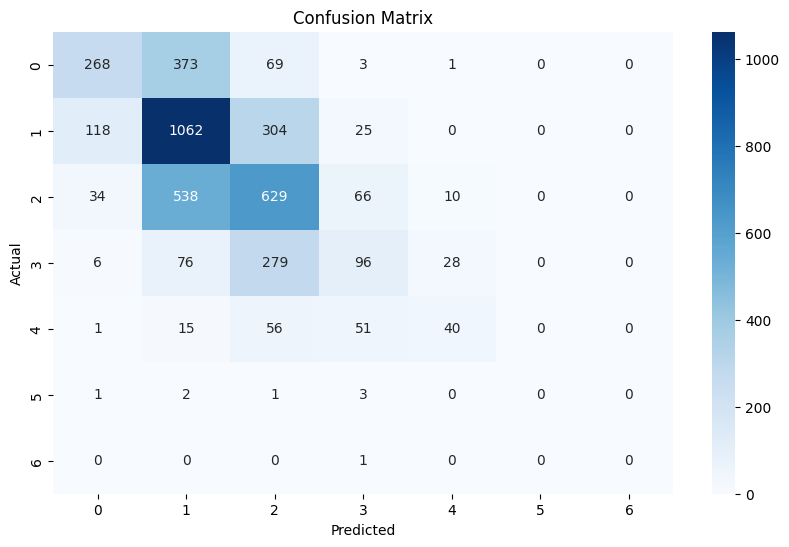

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


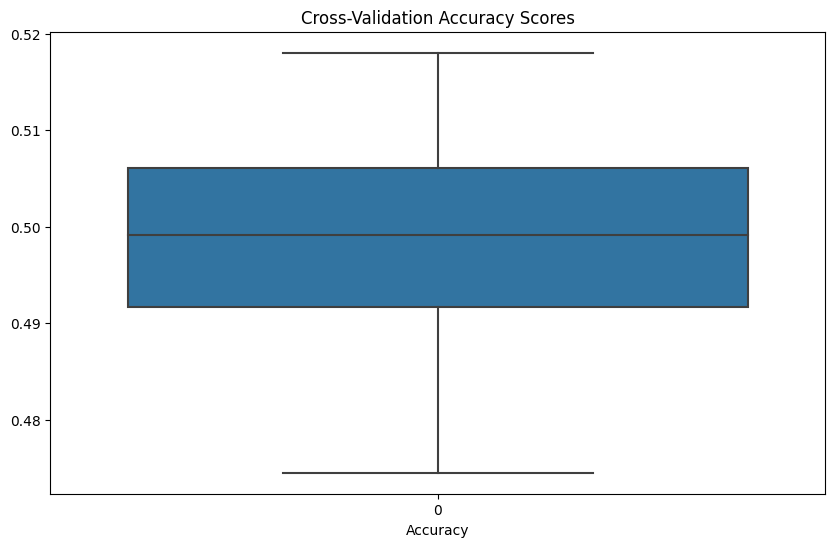

(0.5040904716073147,
 0.35835364182268237,
 0.2878607260701805,
 0.3054486921230157)

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/healthcare-survey/health_dataset.csv')

# Data Cleaning
df.replace(9996, np.nan, inplace=True)
df.dropna(inplace=True)

# Target and features
target = 'Gen_health_state'
X = df.drop(columns=['ADM_RNO1', target])
y = df[target]

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix Plot
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation Accuracy Visualization
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=10, scoring='accuracy')
plt.figure(figsize=(10, 6))
sns.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Accuracy')
plt.show()

accuracy, precision, recall, f1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 3.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tabpfn/base.py:88: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

              precision    recall  f1-score   support

           1       0.79      0.73      0.76       291
           2       0.56      0.66      0.61       290
           3       0.46      0.46      0.46       278
           4       0.57      0.52      0.54       287
           5       0.77      0.76      0.76       310
           7       1.00      1.00      1.00       274
           8       1.00      1.00      1.00       270

    accuracy                           0.73      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



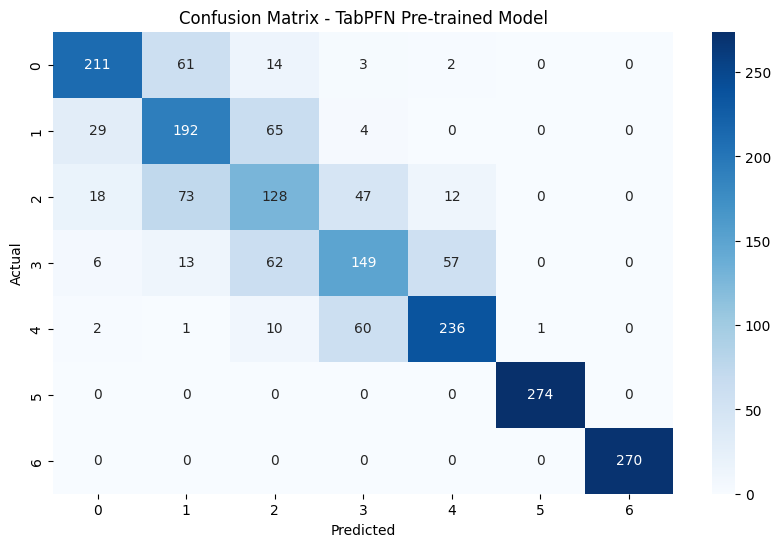

Cross-validated accuracy: 0.7172 ± 0.0092
Accuracy: 0.7300
Precision: 0.7355
Recall: 0.7326
F1 Score: 0.7331


In [1]:
# Google Colab Notebook setup for TabPFN Pre-trained Classifier (GPU enabled)

# Enable GPU usage in Colab by selecting Runtime > Change runtime type > GPU

# Install necessary packages
!pip install tabpfn
!pip install imblearn

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tabpfn import TabPFNClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace path with your dataset location)
df = pd.read_csv('/kaggle/input/healthcare-survey/health_dataset.csv')

# Data preprocessing
df.replace(9996, np.nan, inplace=True)
df.dropna(inplace=True)

# Identify target and features
target = 'Gen_health_state'
X = df.drop(columns=['ADM_RNO1', target])
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Reduce dataset size if larger than 10000 samples
if X_resampled.shape[0] > 10000:
    X_resampled, _, y_resampled, _ = train_test_split(X_resampled, y_resampled, train_size=10000, random_state=42, stratify=y_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize TabPFN pre-trained classifier with GPU support
model = TabPFNClassifier(device='cuda')

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - TabPFN Pre-trained Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation for additional validation
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')

# Feature importance visualization
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    features = X.columns

    plt.figure(figsize=(12, 6))
    sns.barplot(x=importances, y=features, palette='viridis')
    plt.title('Feature Importance - TabPFN')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

# Output evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
